### 1.1 Problem Description
As a student majoring in Quantitative Finance, I am particularly interested in topics related to risk management and internal risk control within financial institutions. Among the many areas of financial risk, credit risk stands out as one of the most fundamental and impactful. Credit risk refers to the possibility that a borrower will fail to repay a loan or meet contractual obligations, resulting in financial losses for the lender. It is a central concern for banks, investment firms, and other lending institutions, as effective credit risk assessment is essential for maintaining portfolio health and ensuring regulatory compliance.

Given its practical relevance and close connection to financial modeling, I chose to focus my project on credit risk prediction. This topic not only aligns well with the core principles of quantitative finance—such as data analysis, statistical modeling, and predictive algorithms—but also provides valuable insight into real-world decision-making processes in the lending industry. By developing a model to assess the likelihood of loan default, this project aims to simulate how risk managers might use data-driven tools to improve credit decisions and manage overall exposure.

### 1.2 Dataset Description
The dataset used in this project is derived from a deep learning simulation based on a real-world Credit Risk Dataset. It contains various applicant-level features relevant to loan approval decisions.

**Feature descriptions:**
- person_age: The applicant's age.
- person_income: Annual income of the applicant.
- person_home_ownership: Home ownership status (e.g., RENT, OWN, MORTGAGE).
- person_emp_length: Number of years the applicant has been employed.
- loan_intent: Purpose of the loan (e.g., EDUCATION, MEDICAL, PERSONAL, VENTURE, HOMEIMPROVEMENT, DEBTCONSOLIDATION).
- loan_grade: Loan grade reflecting creditworthiness (A = best, G = worst).
- loan_amnt: Loan amount requested by the applicant.
- loan_int_rate: Interest rate applied to the loan.
- loan_percent_income: Proportion of income allocated to loan payments.
- cb_person_default_on_file: Whether the applicant has previously defaulted on a loan (Y = yes, N = no).
- cb_person_cred_hist_length: Length of the applicant's credit history in years.
- loan_status: Target variable indicating loan default (1 = default, 0 = no default).

### 1.3 EDA

#### df.describe()

In [22]:
import pandas as pd
df = pd.read_csv("credit_risk_dataset.csv") 
print(df)
df.describe()

       person_age  person_income person_home_ownership  person_emp_length  \
0              22          59000                  RENT              123.0   
1              21           9600                   OWN                5.0   
2              25           9600              MORTGAGE                1.0   
3              23          65500                  RENT                4.0   
4              24          54400                  RENT                8.0   
...           ...            ...                   ...                ...   
32576          57          53000              MORTGAGE                1.0   
32577          54         120000              MORTGAGE                4.0   
32578          65          76000                  RENT                3.0   
32579          56         150000              MORTGAGE                5.0   
32580          66          42000                  RENT                2.0   

           loan_intent loan_grade  loan_amnt  loan_int_rate  loan_status  \

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


#### loan_status pie chart

Target Distribution:
 - No Default (0): 25473 samples (78.18%)
 - Default (1): 7108 samples (21.82%)


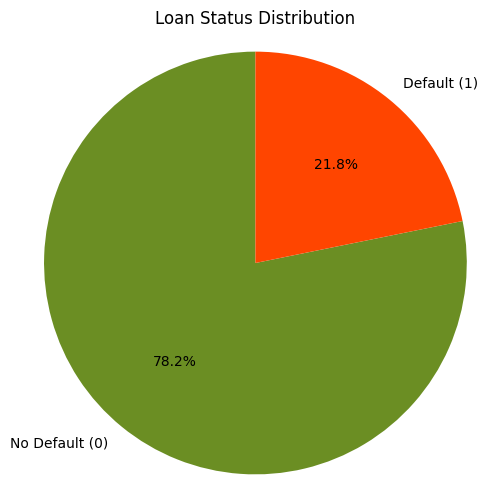

In [2]:
import matplotlib.pyplot as plt

# 目標變數的計數
target_counts = df["loan_status"].value_counts()
labels = ['No Default (0)', 'Default (1)']

# 顯示比例與數量
print("Target Distribution:")
for i, count in enumerate(target_counts):
    percent = 100 * count / len(df)
    print(f" - {labels[i]}: {count} samples ({percent:.2f}%)")

# 畫圓餅圖
plt.figure(figsize=(6, 6))
plt.pie(target_counts,
        labels=labels,
        autopct='%1.1f%%',
        startangle=90,
        colors=['olivedrab', 'orangered'])
plt.title("Loan Status Distribution")
plt.axis('equal')
plt.show()

#### Numerical Distribution

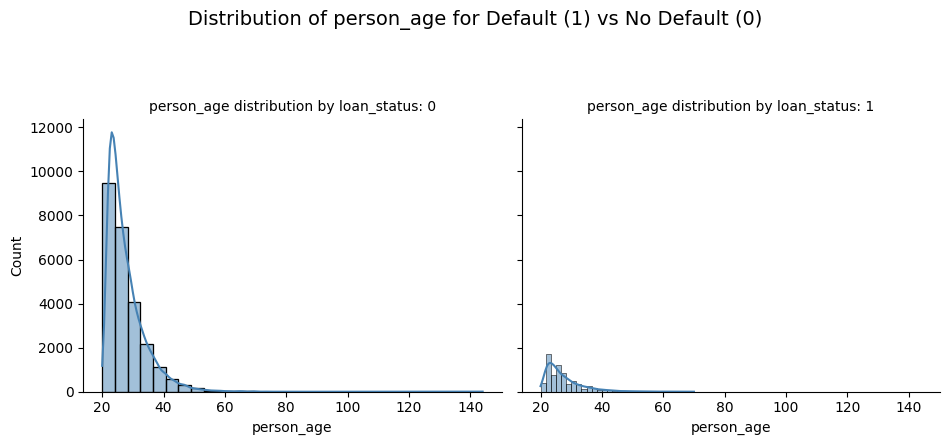

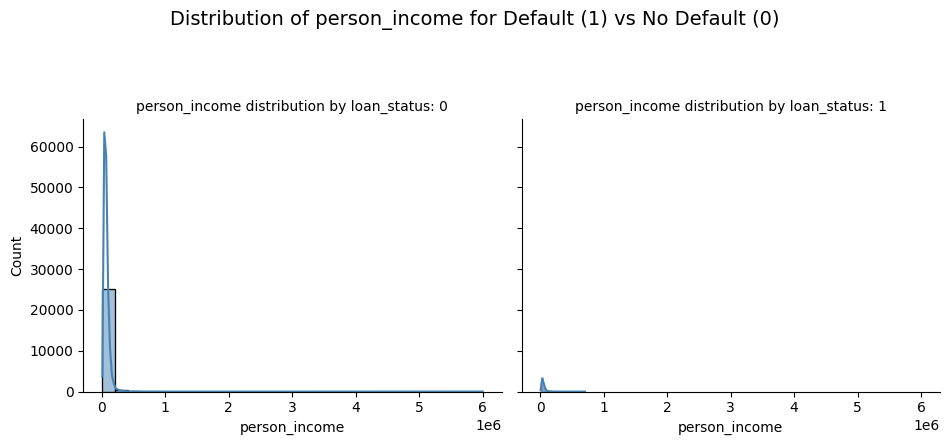

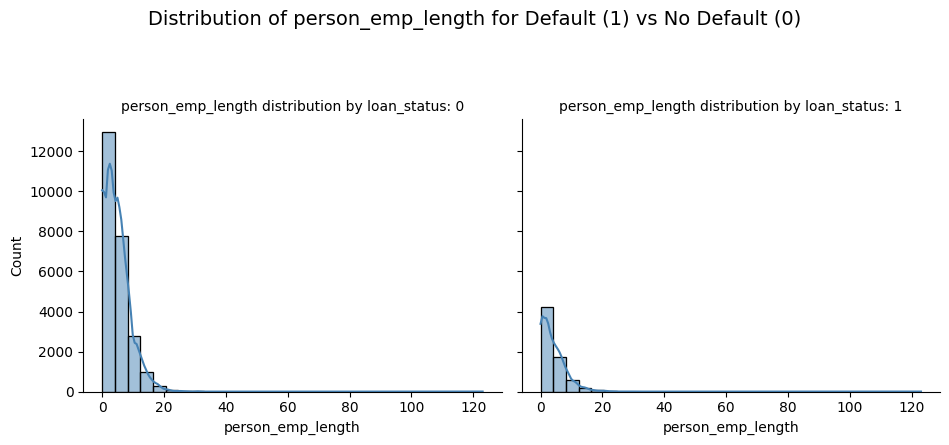

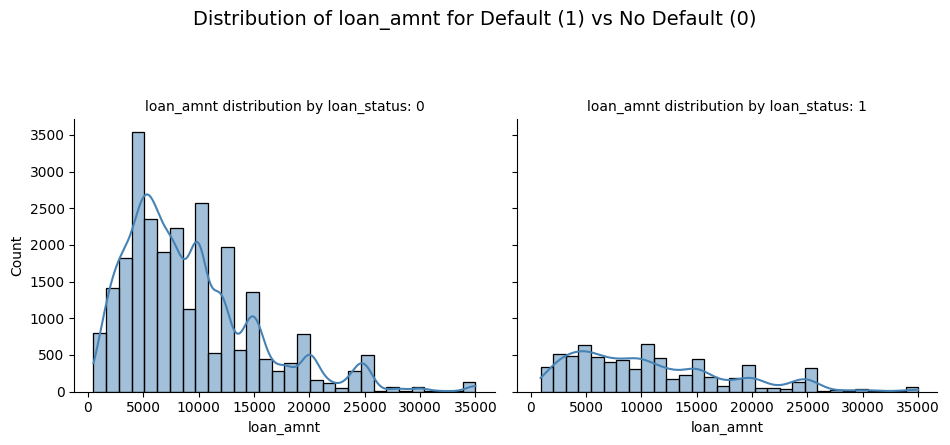

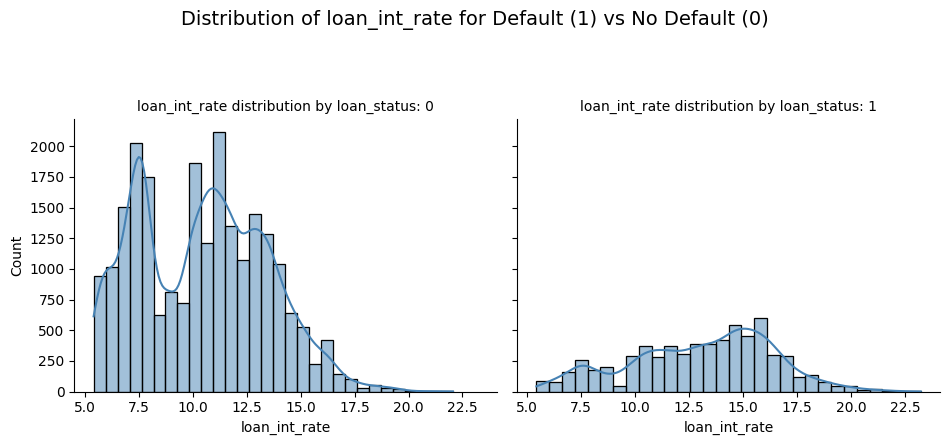

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

# 選擇數值特徵
numeric_cols = df.select_dtypes(include=['int', 'float']).columns.tolist()
numeric_cols.remove("loan_status")

subset_cols = numeric_cols[:5]  

for col in subset_cols:
    g = sns.FacetGrid(df, col="loan_status", height=4, aspect=1.2)
    g.map(sns.histplot, col, bins=30, color="steelblue", kde=True)
    g.set_titles(f"{col} distribution by loan_status: {{col_name}}")
    g.fig.suptitle(f"Distribution of {col} for Default (1) vs No Default (0)", fontsize=14, y=1.1)
    plt.tight_layout()
    plt.show()

#### Category Features

In [4]:
# 整理違約率與樣本數成表格
summary_table = df.groupby("loan_grade")["loan_status"].agg(["count", "mean"]).rename(columns={"mean": "default_rate"})
summary_table["default_rate"] = (summary_table["default_rate"] * 100).round(2)

print("Loan Grade Summary:")
print(summary_table)

Loan Grade Summary:
            count  default_rate
loan_grade                     
A           10777          9.96
B           10451         16.28
C            6458         20.73
D            3626         59.05
E             964         64.42
F             241         70.54
G              64         98.44


Loan grades D to G are associated with higher default rates. We can consider incorporating this feature into the model during the training phase.

/var/folders/3l/8f2cmcp13md5y1xn3_fx_7pw0000gn/T/ipykernel_6595/1289681761.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=default_rates.values * 100,


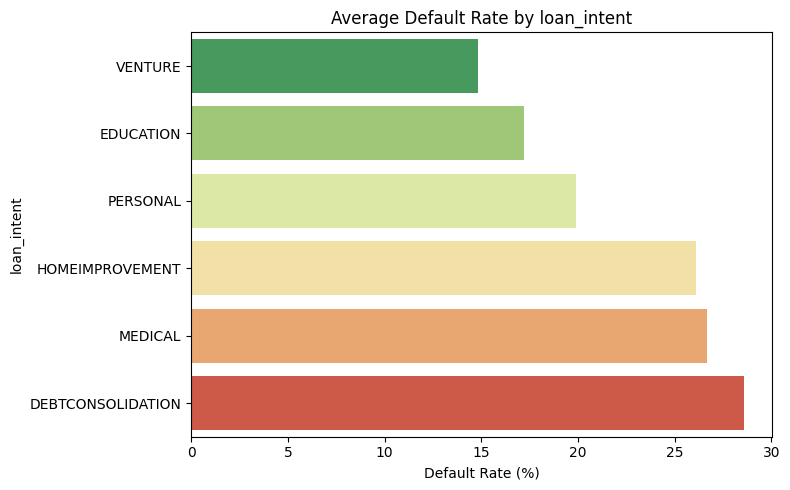

In [5]:
import seaborn as sns

# 選一個欄位試試看
cat_col = "loan_intent"
default_rates = df.groupby(cat_col)["loan_status"].mean().sort_values()

plt.figure(figsize=(8, 5))
sns.barplot(x=default_rates.values * 100,
            y=default_rates.index,
            palette="RdYlGn_r")

plt.xlabel("Default Rate (%)")
plt.title(f"Average Default Rate by {cat_col}")
plt.tight_layout()
plt.show()

#### Correlation Heatmap

/var/folders/3l/8f2cmcp13md5y1xn3_fx_7pw0000gn/T/ipykernel_6595/3232353515.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  corr_df['person_home_ownership'] = corr_df['person_home_ownership'].replace({'RENT': 0, 'MORTGAGE': 1, 'OWN': 2, 'OTHER': 3})
/var/folders/3l/8f2cmcp13md5y1xn3_fx_7pw0000gn/T/ipykernel_6595/3232353515.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  corr_df['loan_intent'] = corr_df['loan_intent'].replace({'EDUCATION': 0, 'MEDICAL': 1, 'PERSONAL': 2,
/var/folders/3l/8f2cmcp13md5y1xn3_fx_7pw0000gn/T/ipyke

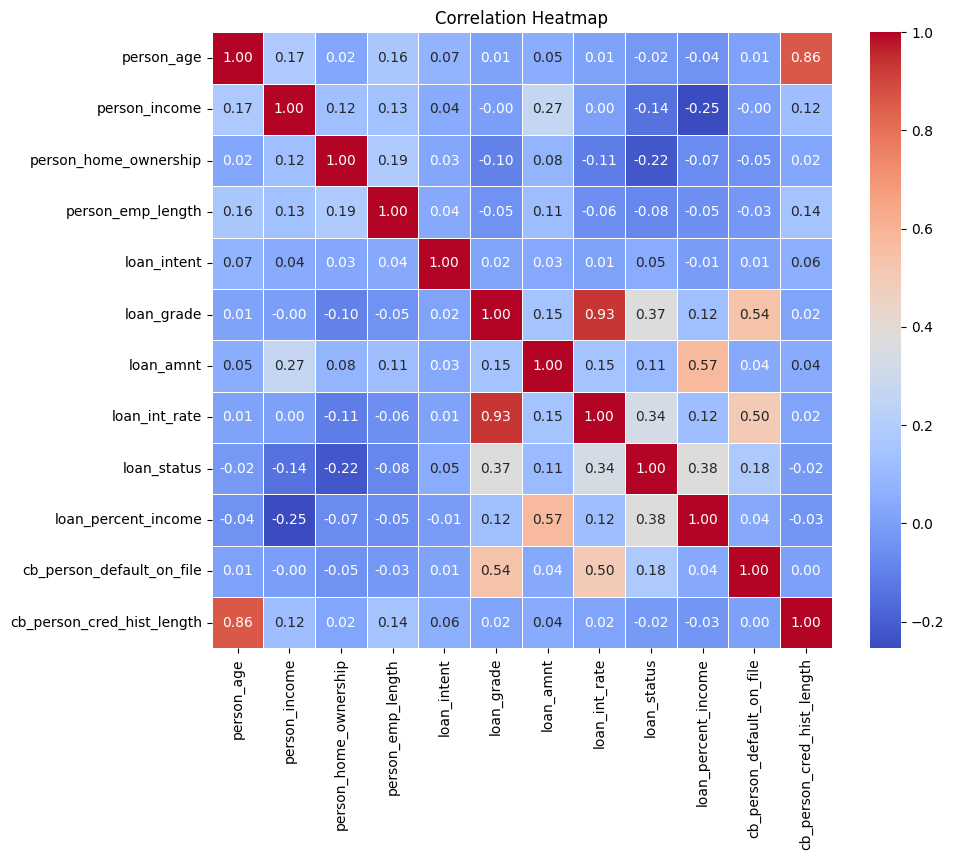

In [6]:
corr_df = df.copy()

# 把類別變數轉為數值（你也可以自己設計映射）
corr_df['person_home_ownership'] = corr_df['person_home_ownership'].replace({'RENT': 0, 'MORTGAGE': 1, 'OWN': 2, 'OTHER': 3})
corr_df['loan_intent'] = corr_df['loan_intent'].replace({'EDUCATION': 0, 'MEDICAL': 1, 'PERSONAL': 2,
                                                         'VENTURE': 3, 'DEBTCONSOLIDATION': 4, 'HOMEIMPROVEMENT': 5})
corr_df['loan_grade'] = corr_df['loan_grade'].replace({'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6})
corr_df['cb_person_default_on_file'] = corr_df['cb_person_default_on_file'].replace({'N': 0, 'Y': 1})

# 計算 correlation
corr_matrix = corr_df.corr(numeric_only=True)

# 畫 heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix,
            annot=True,
            fmt=".2f",
            cmap='coolwarm',
            linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

Our objective is to predict loan_status. Based on the correlation heatmap, we observe that loan_grade (0.37), loan_percent_income (0.38), loan_int_rate (0.34), and cb_person_default_on_file_Y (0.18) exhibit relatively strong positive correlations with the target variable.

### 1.4 Train Model

#### Keras

##### all fratures

In [23]:
import numpy as np
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split

# NaN
for col in ["person_age", "person_income", "person_emp_length",
            "loan_amnt", "loan_int_rate", "loan_percent_income",
            "cb_person_cred_hist_length"]:
    df[col] = df[col].fillna(df[col].mean())
for col in ["person_home_ownership", "loan_intent", "loan_grade", "cb_person_default_on_file"]:
    df[col] = df[col].fillna(df[col].mode()[0])  # mode()[0] = 眾數
print(df.isnull().sum())  

# 類別轉數值
df = pd.get_dummies(df, columns=[
    "person_home_ownership",
    "loan_intent",
    "loan_grade",
    "cb_person_default_on_file"
])

# 分割 X, y
X = df.drop(columns=["loan_status"]).values.astype("float32")
y = df["loan_status"].values.astype("int32")

# 特徵標準化（Z-score）
X_mean = np.mean(X, axis=0)
X_std = np.std(X, axis=0)
X = (X - X_mean) / (X_std + 1e-8)

# 分割訓練、測試集
#split = int(0.8 * len(X))
#X_train, X_test = X[:split], X[split:]
#y_train, y_test = y[:split], y[split:]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y  # stratify=y 可保持類別比例一致
)
print(f'Number of Examples in Training Data (X_train): {X_train.shape[0]}')
print(f'Number of Examples in Test Data     (X_test): {X_test.shape[0]}')
print(f'Total Number of Examples (original dataset) : {X.shape[0]}\n')

print(f'Shape of the Training Data (X_train): {X_train.shape}')
print(f'Shape of the Test Data     (X_test): {X_test.shape}')
print(f'Shape of the Original Data   (X)   : {X.shape}')

print(f'Shape of original DataFrame (df): {df.shape}')

columns = df.drop(columns=["loan_status"]).columns
# 訓練集
train_df = pd.DataFrame(X_train, columns=columns)
train_df["loan_status"] = y_train
print(train_df.head())  

# 測試集
test_df = pd.DataFrame(X_test, columns=columns)
test_df["loan_status"] = y_test
test_df.to_csv("X_test_all_features.csv", index=False)

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64
Number of Examples in Training Data (X_train): 26064
Number of Examples in Test Data     (X_test): 6517
Total Number of Examples (original dataset) : 32581

Shape of the Training Data (X_train): (26064, 26)
Shape of the Test Data     (X_test): (6517, 26)
Shape of the Original Data   (X)   : (32581, 26)
Shape of original DataFrame (df): (32581, 27)
   person_age  person_income  person_emp_length  loan_amnt  loan_int_rate  \
0   -0.430783       2.836302      -1.933007e-01   1.014021      -1.285615   
1   -1.060904      -0.775624       5.148111e-02  -1.279561       0.379128   
2   -0.430783      -0.

In [15]:
# 模型建立與訓練
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X.shape[1],)))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

early_stop = EarlyStopping(
    monitor='val_accuracy',       # 根據驗證準確率來監控
    patience=2,                   # 如果 2 次沒有進步就停止
    restore_best_weights=True     # 回復到表現最好的 epoch 權重
)
model.fit(X_train, y_train, epochs=10, batch_size=64, validation_split=0.1, callbacks=[early_stop])

model.evaluate(X_test, y_test)

Epoch 1/10


/Users/dorislee/miniforge3/envs/tf2/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


367/367 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.7927 - loss: 0.4730 - val_accuracy: 0.8569 - val_loss: 0.3448
Epoch 2/10
367/367 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.8696 - loss: 0.3432 - val_accuracy: 0.8565 - val_loss: 0.3461
Epoch 3/10
367/367 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.8591 - loss: 0.3558 - val_accuracy: 0.8585 - val_loss: 0.3494
Epoch 4/10
367/367 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.8548 - loss: 0.3672 - val_accuracy: 0.8535 - val_loss: 0.3700
Epoch 5/10
367/367 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.8467 - loss: 0.3845 - val_accuracy: 0.8542 - val_loss: 0.3694
204/204 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8584 - loss: 0.3595


[0.3540169298648834, 0.8600583076477051]

##### partial features

In [25]:
selected_features = [
    'loan_grade_G', 'loan_grade_F', 'loan_grade_E', 'loan_grade_D',
    'loan_percent_income',
    'loan_int_rate',
    'cb_person_default_on_file_Y'
]

X = df[selected_features].values.astype("float32")
y = df["loan_status"].values.astype("int32")

# 特徵標準化（Z-score）
X_mean = np.mean(X, axis=0)
X_std = np.std(X, axis=0)
X = (X - X_mean) / (X_std + 1e-8)

#split = int(0.8 * len(X))
#X_train, X_test = X[:split], X[split:]
#y_train, y_test = y[:split], y[split:]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y  # stratify=y 可保持類別比例一致
)

print(f'Shape of the Training Data (X_train): {X_train.shape}')
print(f'Shape of the Test Data     (X_test): {X_test.shape}')
print(f'Shape of the Original Data   (X)   : {X.shape}')

print(f'Shape of original DataFrame (df): {df.shape}')

# 訓練集
train_df = pd.DataFrame(X_train, columns=selected_features)
train_df["loan_status"] = y_train
print(train_df.head())
# 測試集
test_df = pd.DataFrame(X_test, columns=selected_features)
test_df["loan_status"] = y_test
print(test_df.head())


Shape of the Training Data (X_train): (26064, 7)
Shape of the Test Data     (X_test): (6517, 7)
Shape of the Original Data   (X)   : (32581, 7)
Shape of original DataFrame (df): (32581, 27)
   loan_grade_G  loan_grade_F  loan_grade_E  loan_grade_D  \
0     -0.044364     -0.086325     -0.174614     -0.353877   
1     -0.044364     -0.086325     -0.174614     -0.353877   
2     -0.044364     -0.086325     -0.174614     -0.353877   
3     -0.044364     -0.086325     -0.174614     -0.353877   
4     -0.044364     -0.086325     -0.174614     -0.353877   

   loan_percent_income  loan_int_rate  cb_person_default_on_file_Y  \
0            -0.938410      -1.285615                    -0.462686   
1            -0.844759       0.379128                    -0.462686   
2             1.215549       0.492707                    -0.462686   
3             1.215549       0.963248                    -0.462686   
4             0.279045      -1.009780                    -0.462686   

   loan_status  
0    

In [17]:
# 模型建立與訓練
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X.shape[1],)))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

early_stop = EarlyStopping(
    monitor='val_accuracy',       # 根據驗證準確率來監控
    patience=2,                   # 如果 2 次沒有進步就停止
    restore_best_weights=True     # 回復到表現最好的 epoch 權重
)
model.fit(X_train, y_train, epochs=10, batch_size=64, validation_split=0.1, callbacks=[early_stop])

model.evaluate(X_test, y_test)

Epoch 1/10


/Users/dorislee/miniforge3/envs/tf2/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


367/367 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.8130 - loss: 0.4663 - val_accuracy: 0.8239 - val_loss: 0.3814
Epoch 2/10
367/367 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.8308 - loss: 0.3919 - val_accuracy: 0.8262 - val_loss: 0.4028
Epoch 3/10
367/367 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.8277 - loss: 0.3922 - val_accuracy: 0.8282 - val_loss: 0.3794
Epoch 4/10
367/367 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.8271 - loss: 0.3919 - val_accuracy: 0.8347 - val_loss: 0.3858
Epoch 5/10
367/367 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.8290 - loss: 0.3997 - val_accuracy: 0.8362 - val_loss: 0.3950
Epoch 6/10
367/367 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.8244 - loss: 0.4080 - val_accuracy: 0.8289 - val_loss: 0.3856
Epoch 7/10
367/367 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.8213 - loss: 0.4135 - val_accuracy: 0.8186 - val_loss: 0.4075
204/204 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8326 - loss: 0.4130


[0.4069567918777466, 0.8335123658180237]

#### PyTorch

In [11]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
from sklearn.metrics import accuracy_score

# 轉換為 tensor
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)

# 建 DataLoader
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
test_loader = DataLoader(test_dataset, batch_size=64)

# 模型定義（64 → 32 → 1, sigmoid）
class CreditMLP(nn.Module):
    def __init__(self, input_dim):
        super(CreditMLP, self).__init__()
        self.fc1 = nn.Linear(input_dim, 64)
        self.fc2 = nn.Linear(64, 32)
        self.out = nn.Linear(32, 1)
    
    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.sigmoid(self.out(x))  # 二元分類使用 sigmoid
        return x

model = CreditMLP(input_dim=X.shape[1])

# 損失與優化器
criterion = nn.BCELoss()  # binary classification
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# 訓練
EPOCHS = 10
for epoch in range(EPOCHS):
    model.train()
    epoch_loss = 0
    for xb, yb in train_loader:
        pred = model(xb)
        loss = criterion(pred, yb)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()
    print(f"Epoch {epoch+1}, Loss: {epoch_loss:.4f}")

# 評估
model.eval()
with torch.no_grad():
    preds = model(X_test_tensor)
    predicted_labels = (preds >= 0.5).float()
    acc = accuracy_score(y_test_tensor.numpy(), predicted_labels.numpy())
    print(f"\nTest Accuracy: {acc * 100:.2f}%")

Epoch 1, Loss: 171.3766
Epoch 2, Loss: 156.6362
Epoch 3, Loss: 155.9048
Epoch 4, Loss: 155.5661
Epoch 5, Loss: 155.3315
Epoch 6, Loss: 154.9511
Epoch 7, Loss: 154.8658
Epoch 8, Loss: 154.4100
Epoch 9, Loss: 154.3148
Epoch 10, Loss: 154.3028

Test Accuracy: 85.42%


### Conclusion/Future Work